# CE2101/CZ2101 ALGORITHM DESIGN AND ANALYSIS
# Project 1: Integration of Mergesort & Insertion Sort

In [1]:
import random
from time import process_time
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', None)

### (a) Algorithm implementation: Implement the above hybrid algorithm.

In [2]:
#################### MERGESORT & INSERTION SORT ####################
#### input: array, threshold integer | output: key comparisons
returnArr = []
def insertMergeSort(arr, S):
    keyComp = 0
    if len(arr) > S:
        mid = len(arr) // 2  # floor division

        left = arr[:mid]
        right = arr[mid:]
        keyComp += insertMergeSort(left, S)
        keyComp += insertMergeSort(right, S)

        # merge
        # index to keep track of arr
        index = 0
        leftIndex = 0
        rightIndex = 0

        while leftIndex < len(left) and rightIndex < len(right):
            keyComp += 1
            if left[leftIndex] < right[rightIndex]:
                arr[index] = left[leftIndex]  # write into arr (sorted array)
                leftIndex += 1
                # remove the element from left sublist
            else:
                arr[index] = right[rightIndex]  # write into arr (sorted array)
                rightIndex += 1
                # remove the element from right sublist
            index += 1

        # Check for remaining elements
        # Only one of these loops will run
        while leftIndex < len(left):
            arr[index] = left[leftIndex]
            leftIndex += 1
            index += 1
        while rightIndex < len(right):
            arr[index] = right[rightIndex]
            rightIndex += 1
            index += 1
    else:
        # Insertion Sort
        for i in range(1, len(arr)):
            for j in range(i, 0, -1):
                keyComp += 1
                if arr[j] < arr[j - 1]:
                    arr[j], arr[j - 1] = arr[j - 1], arr[j]
                else:
                    break
                    
    arr = returnArr
    return keyComp  # report key comparisons
####################################################################

### (b) Generate input data: Generate arrays of increasing sizes, in a range from 1,000 to 10 million.

In [3]:
######################## INPUT GENERATOR ########################
### input: array size, largest integer allowed | output: array
def inputGen(sizeArr, x):
    returnList = []
    for i in range(0, sizeArr):
        n = random.randint(1, x)
        returnList.append(n)
    return returnList
################################################################

### Helper Functions

In [4]:
##################### printList #####################
### input: array | output: N/A (print to console)
def printList(arr):
    for i in range(len(arr)):
        print(arr[i], end=" ")
    print()
####################################################

In [5]:
##################### plotGraphFromDF #####################
### input: dataframe with two columns, X and Y | output: N/A (pop-up window with plot)
def plotGraphFromDF(df):
    plt.plot(df[df.columns[0]], df[df.columns[1]])
    plt.title(df.columns[1] + ' against ' + df.columns[0])
    plt.ylabel(df.columns[1])
    plt.xlabel(df.columns[0])

plt.show()
####################################################

## (c) Analyze time complexity

#### Cursory note 1: why we need to use number of key comparisons instead of time taken

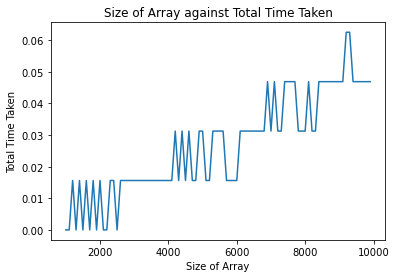

In [6]:
S = 4
sizeArr = []
keyCompArr = []
timeArr = []
for i in range(pow(10,3), pow(10,4), 100):
    arr = inputGen(i, pow(10,4))
    startTime = process_time()
    keyComp = insertMergeSort(arr, S)
    stopTime = process_time()
    totalTime = stopTime - startTime

    sizeArr.append(i)
    keyCompArr.append(keyComp)
    timeArr.append(totalTime)

plotGraphFromDF(
    pd.DataFrame(
        {
            'Size of Array'             : sizeArr,
            'Total Time Taken'          : timeArr
        }
    )
)

#### As seen from the graph, measuring time taken is not a reliable metric.

##### This is because it is highly dependent on the availability of CPU resources / presence of other programs. 

#### Thus, we need to adopt a more theoretical framework by observing the number of key comparisons.

#### Cursory note 2: why we need to fix x, the largest number we allow for our datasets

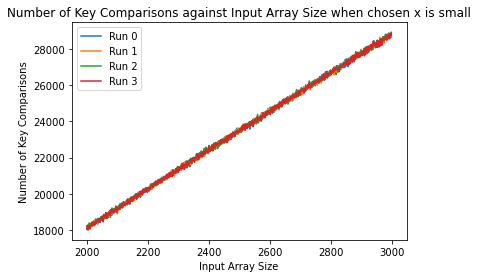

In [7]:
S = 4
keyCompArr = []
keyCompArrOfArr = []
df = pd.DataFrame(size for size in range(2000,3000))
df.columns = ['Size of Array']
loops = 4

x=5
for loop in range(loops):
    keyCompArr = []
    for i in df['Size of Array']:
        arr = inputGen(i, x)
        keyCompArr.append(insertMergeSort(arr, S))
    plt.plot(df['Size of Array'], keyCompArr, label = "Run " + str(loop))
    
plt.legend()
plt.title("Number of Key Comparisons against Input Array Size when chosen x is small")
plt.ylabel("Number of Key Comparisons")
plt.xlabel("Input Array Size")
plt.show()

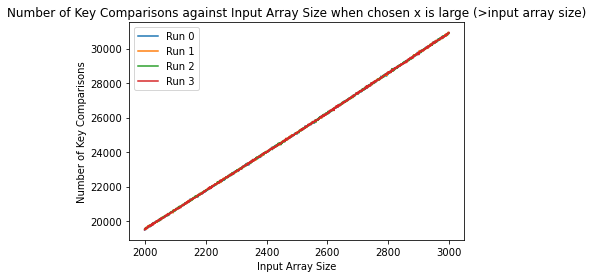

In [8]:
S = 4
keyCompArr = []
keyCompArrOfArr = []
df = pd.DataFrame(size for size in range(2000,3000))
df.columns = ['Size of Array']
loops = 4

x=1000000
for loop in range(loops):
    keyCompArr = []
    for i in df['Size of Array']:
        arr = inputGen(i, x)
        keyCompArr.append(insertMergeSort(arr, S))
    plt.plot(df['Size of Array'], keyCompArr, label = "Run " + str(loop))
    
plt.legend()
plt.title("Number of Key Comparisons against Input Array Size when chosen x is large (>input array size)")
plt.ylabel("Number of Key Comparisons")
plt.xlabel("Input Array Size")
plt.show()

#### As seen from comparing the two graphs, the variability of the number of key comparisons is greater when x is small.

##### This is because, with small x, there is a higher probability of having duplicate keys in the array. This will result in less key comparisons when sorting.

##### Formally, if x is less than the array size, there will definitely be duplicate keys (pigeonhole principle), although the inverse is not true (we can still have duplicate keys with high x by the nature of random number generator)

#### Thus, we need to select a sufficiently high value of x.

## i. With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.

In [ ]:
S = 4
sizeArr = []
keyCompArr = []
for i in range(pow(10,3), pow(10,7), 100):
    arr = inputGen(i, pow(10,7))
    keyComp = insertMergeSort(arr, S)

    sizeArr.append(i)
    keyCompArr.append(keyComp)

plotGraphFromDF(
    pd.DataFrame(
        {
            'Size of Array'             : sizeArr,
            'Number of Key Comparisons' : keyCompArr
        }
    )
)

In [ ]:
print('lol')

### Time Complexity for insertMergeSort (S=4)

#### INSERTIONSORT PART
- The ith iteration may have 1,2...i key comparisons, each with 1/i chance. 
- Average number of comparisons in the ith iteration: 

1⠀⠀⠀i⠀⠀⠀⠀⠀⠀⠀⠀⠀1

–⠀⠀⠀∑⠀⠀j⠀⠀⠀=⠀⠀–⠀(1+2+...+i)

i⠀⠀⠀j=1⠀⠀⠀⠀⠀⠀⠀⠀i

- Hence, total complexity:

S-1⠀⠀⠀1⠀⠀⠀i⠀⠀⠀⠀⠀⠀⠀⠀⠀

⠀∑ ⠀(⠀–⠀⠀⠀∑⠀⠀j⠀⠀)⠀⠀⠀

i=1⠀⠀⠀i⠀⠀⠀j=1⠀⠀⠀⠀⠀

------

S-1⠀⠀⠀1⠀⠀⠀i (i+1)⠀⠀⠀⠀⠀⠀⠀

⠀∑ ⠀(⠀–⠀⠀––––––    )⠀⠀⠀

i=1⠀⠀⠀i⠀⠀⠀⠀2⠀⠀⠀⠀⠀

------

S-1⠀⠀⠀1⠀⠀⠀⠀⠀⠀⠀⠀⠀

⠀∑ ⠀(⠀–⠀⠀(i+1)   )⠀⠀⠀

i=1⠀⠀⠀2⠀⠀⠀⠀⠀⠀⠀⠀⠀

------

= 1/2 (2+S)(S-1)/2

= (S+2)(S-1)/4

Since S is fixed, total time complexity = O(1)

-----

#### MERGESORT PART
##### Merge function:
- Best case, e.g. when list is already sorted allowing first sublist to traverse till end, is Θ(n/2)
- Worst case, e.g. when list is sorted the wrong way, is Θ(n-1)

##### Main function in worst case:

W(n)

= W(n/2) + W(n/2) + (n-1)
    
= 2W(n/2) + (n-1)
    
= 2<sup>2</sup>W(n/2<sup>2</sup>) + (n-1) + 2(n/2-1)
    
= 2<sup>3</sup>W(n/2<sup>3</sup>) + (n-1) + 2(n/2-1) + 2<sup>2</sup>(n/2<sup>2</sup>-1)
    
= ....

= 2<sup>k</sup>W(n/2<sup>k</sup>) + (n-1) + 2(n/2-1) + 2<sup>2</sup>(n/2<sup>2</sup>-1) + ... + 2<sup>k</sup>(n/2<sup>k</sup>-1)

For S=4, terminating condition is when 2<sup>k</sup> = n/4, hence n = 2<sup>k+2</sup> and log<sub>2</sub>n = k+2

= nW(4)/4 + (n-1) + 2(n/2-1) + 2<sup>2</sup>(n/2<sup>2</sup>-1) + ... + (n-2<sup>k</sup>)

= nW(4)/4 + (n-1) + (n-2) + (n-2<sup>2</sup>) ... + (n-2<sup>k</sup>)

= nW(4)/4 + (n-2<sup>0</sup>) + (n-2<sup>1</sup>) + (n-2<sup>2</sup>) ... + (n-2<sup>k</sup>)

= nW(4)/4 + (k+1)(n) - (2<sup>0</sup>+2<sup>1</sup>+2<sup>2</sup>...+2<sup>k</sup>)

= nW(4)/4 + (k+1)(n) - (1(2<sup>k+1</sup>-1)/(2-1))

= nW(4)/4 + (k+1)(n) - (2<sup>k+1</sup>-1)

= nW(4)/4 + (k+1)(n) - (n/2-1)

= nW(4)/4 + (log<sub>2</sub>n-1)(n) - (n/2-1)

= O(n) + O(nlgn) - O(n) = O(nlgn)